## Regresion Lineal

Estudiante: Karen Natalia Martinez Romero,
Grupo: 86

In [ ]:
pip install numpy pandas scikit-learn matplotlib

In [5]:
import numpy as np # Cálculo numérico y el análisis de datos
import pandas as pd # Manejo y análisis de estructuras de datos
import matplotlib.pyplot as plt # Creación de gráficos en dos dimensiones

# Librerías de para implementar modelos de ciencia de datos
from sklearn.linear_model import LinearRegression

In [6]:
# Lectura de datos en Python y lo cargamos en la variable Datos
car_data = pd.read_csv(r'D:\Ingenieria de sistemas\Semestre 7\ANÁLISIS DE DATOS\Tarea 3\car_data.csv')

In [8]:
# Realizamos lectura de los Datos para el análisis exploratorio
car_data.head(5)

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [12]:
# Revisar numero de filas y columnas
car_data.shape

(301, 9)

In [14]:
# Obtener información del dataset para entender 
car_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [16]:
#Verificar el numero de valores nulos
car_data.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [18]:
# Verificar la distribución de los datos categóricos
print(car_data.Fuel_Type.value_counts())
print(car_data.Seller_Type.value_counts())
print(car_data.Transmission.value_counts())

Fuel_Type
Petrol    239
Diesel     60
CNG         2
Name: count, dtype: int64
Seller_Type
Dealer        195
Individual    106
Name: count, dtype: int64
Transmission
Manual       261
Automatic     40
Name: count, dtype: int64


In [20]:
# Los datos categoricos se convieten a valores numéricos, esto permite que los modelos interpreten y procesen la información de manera efectiva
# "Fuel_Type"
car_data.replace({'Fuel_Type':{'Petrol':0, 'Diesel':1, 'CNG':2}}, inplace=True)

# "Seller_Type"
car_data.replace({'Seller_Type':{'Dealer':0, 'Individual':1}}, inplace=True)

# "Transmission"
car_data.replace({'Transmission':{'Manual':0, 'Automatic':1}}, inplace=True)

C:\Users\knata\AppData\Local\Temp\ipykernel_40204\3057170603.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  car_data.replace({'Fuel_Type':{'Petrol':0, 'Diesel':1, 'CNG':2}}, inplace=True)
C:\Users\knata\AppData\Local\Temp\ipykernel_40204\3057170603.py:6: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  car_data.replace({'Seller_Type':{'Dealer':0, 'Individual':1}}, inplace=True)
C:\Users\knata\AppData\Local\Temp\ipykernel_40204\3057170603.py:9: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in 

In [22]:
# Realizamos lectura de los Datos para el análisis exploratorio
car_data.head(5)

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,0,0,0
1,sx4,2013,4.75,9.54,43000,1,0,0,0
2,ciaz,2017,7.25,9.85,6900,0,0,0,0
3,wagon r,2011,2.85,4.15,5200,0,0,0,0
4,swift,2014,4.60,6.87,42450,1,0,0,0


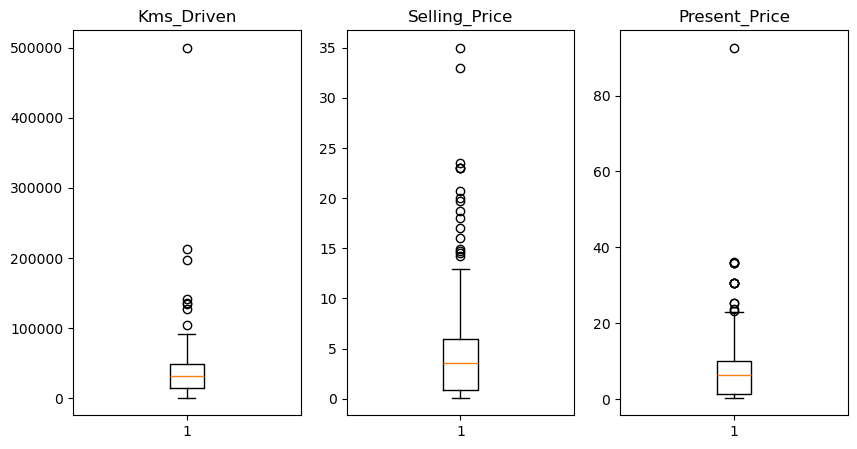

In [40]:
# Verificamos si hay outliers visualmente

plt.figure(figsize=(10, 5))
plt.subplot(1, 3, 1)
plt.boxplot(car_data['Kms_Driven'])
plt.title('Kms_Driven')
plt.subplot(1, 3, 2)
plt.boxplot(car_data['Selling_Price'])
plt.title('Selling_Price')
plt.subplot(1, 3, 3)
plt.boxplot(car_data['Present_Price'])
plt.title('Present_Price')
plt.show()

(276, 9)


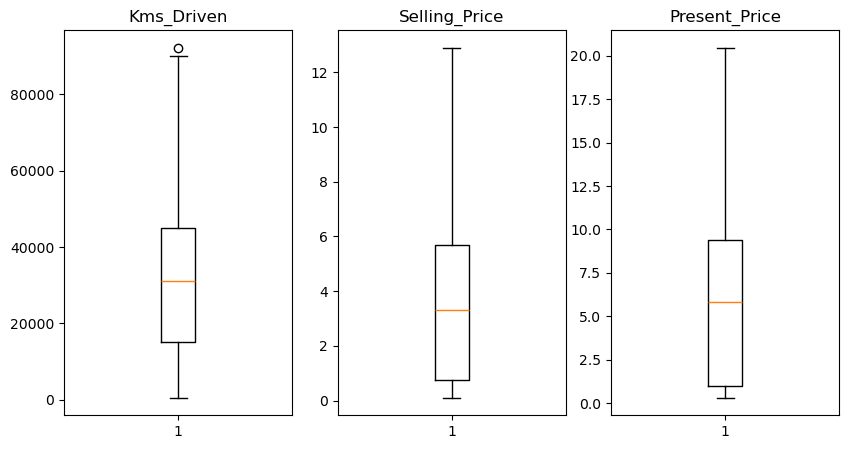

In [46]:
# Definimos la función para detectar y eliminar outliers usando IQR
def eliminar_outliers(df, columna):
    Q1 = df[columna].quantile(0.25)
    Q3 = df[columna].quantile(0.75)
    IQR = Q3 - Q1
    df_filtrado = df[(df[columna] >= Q1 - 1.5 * IQR) & (df[columna] <= Q3 + 1.5 * IQR)]
    return df_filtrado

# Aplicamos la función a cada columna de donde queremos eliminar los outliers
car_data = eliminar_outliers(car_data, 'Kms_Driven')
car_data = eliminar_outliers(car_data, 'Selling_Price')
car_data = eliminar_outliers(car_data, 'Present_Price')

# Visualizamos nuevamente para confirmar la eliminación de outliers
plt.figure(figsize=(10, 5))
plt.subplot(1, 3, 1)
plt.boxplot(car_data['Kms_Driven'])
plt.title('Kms_Driven')
plt.subplot(1, 3, 2)
plt.boxplot(car_data['Selling_Price'])
plt.title('Selling_Price')
plt.subplot(1, 3, 3)
plt.boxplot(car_data['Present_Price'])
plt.title('Present_Price')
plt.show()

In [48]:
#Verificamos el cambio de datos
car_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 276 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       276 non-null    object 
 1   Year           276 non-null    int64  
 2   Selling_Price  276 non-null    float64
 3   Present_Price  276 non-null    float64
 4   Kms_Driven     276 non-null    int64  
 5   Fuel_Type      276 non-null    int64  
 6   Seller_Type    276 non-null    int64  
 7   Transmission   276 non-null    int64  
 8   Owner          276 non-null    int64  
dtypes: float64(2), int64(6), object(1)
memory usage: 21.6+ KB


Intercepto (β0): 0.444499995193925
Coeficiente (Present_Price, β1): [0.55065059]


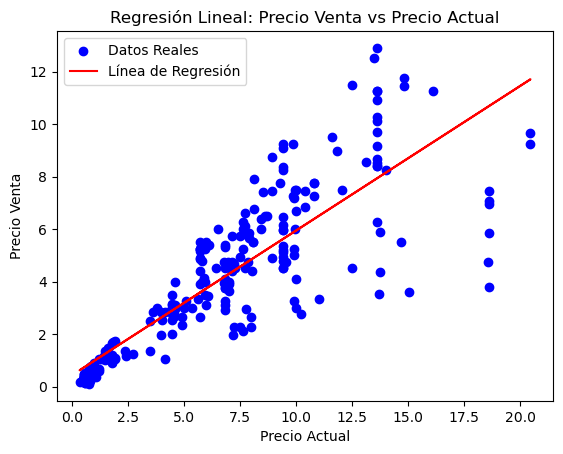

In [68]:
# Asignamos X y Y
X = car_data[['Present_Price']]  # Variable independientes del modelo
Y = car_data['Selling_Price']  # Variable objetivo

# Creamos un modelo de regresión lineal
modelo = LinearRegression()

# Ajustamo el modelo a los datos
modelo.fit(X, Y)

# Coeficientes de la regresión
beta_0 = modelo.intercept_  # Intercepto
beta_1 = modelo.coef_  # Pendientes (Precio Actual)

# Mostramos los coeficientes
print(f"Intercepto (β0): {beta_0}")
print(f"Coeficiente (Present_Price, β1): {beta_1}")

# Visualizar la regresión
plt.scatter(car_data['Present_Price'], Y, color='blue', label='Datos Reales')
plt.plot(car_data['Present_Price'], modelo.predict(X), color='red', label='Línea de Regresión')
plt.title('Regresión Lineal: Precio Venta vs Precio Actual')
plt.xlabel('Precio Actual')
plt.ylabel('Precio Venta')
plt.legend()
plt.show()

In [93]:
# Predecir precios para dos nuevos valores
nuevo_X = np.array([[0], [1], [10], [20], [100]])  # Nuevos valores de Precio Actual
predicciones = modelo.predict(nuevo_X)

# Mostrar las predicciones
print("\nPredicciones:")
print(f"Coeficiente (β1): {modelo.coef_[0]:.10f}")
for i, pred in enumerate(predicciones):
    print(f"Predicción {i+1} para (Precio Actual: {nuevo_X[i][0]}): {pred:.4f}")


Predicciones:
Coeficiente (β1): 0.5506505881
Predicción 1 para (Precio Actual: 0): 0.4445
Predicción 2 para (Precio Actual: 1): 0.9952
Predicción 3 para (Precio Actual: 10): 5.9510
Predicción 4 para (Precio Actual: 20): 11.4575
Predicción 5 para (Precio Actual: 100): 55.5096


C:\Users\knata\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [114]:
# Regresión Lineal Múltiple
# Asignamos X y Y
X = car_data[['Present_Price', 'Kms_Driven', 'Year']]  # Variables independientes del modelo
Y = car_data['Selling_Price']  # Variable objetivo

# Creamos un modelo de regresión lineal
modelo = LinearRegression()

# Ajustamos el modelo a los datos
modelo.fit(X, Y)

# Coeficientes de la regresión
beta_0 = modelo.intercept_  # Intercepto
beta_1, beta_2, beta_3 = modelo.coef_  # Pendientes

# Mostramos los coeficientes
print(f"Intercepto (β0): {beta_0}")
print(f"Coeficiente (Present_Price, β1): {beta_1}")
print(f"Coeficiente (Kms_Driven, β2): {beta_2}")
print(f"Coeficiente (Year, β3): {beta_3}")

Intercepto (β0): -651.2117528815901
Coeficiente (Present_Price, β1): 0.5724099131749417
Coeficiente (Kms_Driven, β2): -7.347035107853508e-06
Coeficiente (Year, β3): 0.32365558415965107


In [132]:
# Predecir precios para varios nuevos valores
nuevo_X = np.array([[0, 0, 0], [0, 0, 2024], [0, 1000, 2024], [1, 0, 2024], [0, 0, 2023], [1, 1000, 2023]])  # Nuevos valores para la predicción
predicciones = modelo.predict(nuevo_X)

# Mostrar los coeficientes
print(f"Intercepto (β0): {beta_0}")
print(f"Coeficiente (Present_Price, β1): {beta_1}")
print(f"Coeficiente (Kms_Driven, β2): {beta_2}")
print(f"Coeficiente (Year, β3): {beta_3}")
print("\nPredicciones:")

# Mostrar las predicciones con los valores de las variables independientes
for i, pred in enumerate(predicciones):
    print(f"Predicción {i+1} para (Present_Price: {nuevo_X[i][0]}, Kms_Driven: {nuevo_X[i][1]}, Year: {nuevo_X[i][2]}): {pred:.4f}")

# Comparación de cada predicción con respecto a la Predicción 2
print("\nComparación con respecto a la Predicción 2:")
segunda_prediccion = predicciones[1]
for i, pred in enumerate(predicciones):
    if i != 1:  # No comparar la predicción 2 consigo misma
        cambio = pred - segunda_prediccion
        print(f"Diferencia de Predicción {i+1} con respecto a la Predicción 2: {cambio:.4f}")

Intercepto (β0): -651.2117528815901
Coeficiente (Present_Price, β1): 0.5724099131749417
Coeficiente (Kms_Driven, β2): -7.347035107853508e-06
Coeficiente (Year, β3): 0.32365558415965107

Predicciones:
Predicción 1 para (Present_Price: 0, Kms_Driven: 0, Year: 0): -651.2118
Predicción 2 para (Present_Price: 0, Kms_Driven: 0, Year: 2024): 3.8671
Predicción 3 para (Present_Price: 0, Kms_Driven: 1000, Year: 2024): 3.8598
Predicción 4 para (Present_Price: 1, Kms_Driven: 0, Year: 2024): 4.4396
Predicción 5 para (Present_Price: 0, Kms_Driven: 0, Year: 2023): 3.5435
Predicción 6 para (Present_Price: 1, Kms_Driven: 1000, Year: 2023): 4.1086

Comparación con respecto a la Predicción 2:
Diferencia de Predicción 1 con respecto a la Predicción 2: -655.0789
Diferencia de Predicción 3 con respecto a la Predicción 2: -0.0073
Diferencia de Predicción 4 con respecto a la Predicción 2: 0.5724
Diferencia de Predicción 5 con respecto a la Predicción 2: -0.3237
Diferencia de Predicción 6 con respecto a la Pre

C:\Users\knata\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [136]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# Variables independientes (X) y variable objetivo (Y)
X = car_data[['Present_Price', 'Kms_Driven', 'Year']]
Y = car_data['Selling_Price']

# Definir el modelo de regresión lineal
modelo = LinearRegression()

# Entrenar el modelo con los datos
modelo.fit(X, Y)

# Realizar predicciones en los datos de entrenamiento
predicciones = modelo.predict(X)

# Calcular las métricas de evaluación
r2 = r2_score(Y, predicciones)                     # Coeficiente de determinación R²
mae = mean_absolute_error(Y, predicciones)         # Error Absoluto Medio (MAE)
mse = mean_squared_error(Y, predicciones)          # Error Cuadrático Medio (MSE)
rmse = np.sqrt(mse)                                # Raíz del Error Cuadrático Medio (RMSE)

# Imprimir las métricas
print(f"R² (Coeficiente de determinación): {r2}")
print(f"Error Absoluto Medio (MAE): {mae}")
print(f"Error Cuadrático Medio (MSE): {mse}")
print(f"Raíz del Error Cuadrático Medio (RMSE): {rmse}")

R² (Coeficiente de determinación): 0.8402717897755113
Error Absoluto Medio (MAE): 0.8847384288561281
Error Cuadrático Medio (MSE): 1.497882020860116
Raíz del Error Cuadrático Medio (RMSE): 1.223879904590363
